<a href="https://colab.research.google.com/github/ElindRase/Capstone_Ethnicity_Education_Geographic_Area/blob/main/Capstone_3_tucson_demographics_and_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To start, I am going to import the data sources from the City of Tucson and merge them into one data frame using pandas.

In [ ]:
import pandas as pd
import matplotlib as plt
from scipy import stats


# set settings to default='warn' to avoid stopping execution of code
pd.options.mode.chained_assignment = None 


# grab datasets from website link
race_df = pd.read_csv('https://opendata.arcgis.com/datasets/35fda63efad14a7b8c2a0a68d77020b7_0.csv')
education_df = pd.read_csv('https://opendata.arcgis.com/datasets/9978db16633f4d45ac8a6b31d82f95f7_0.csv')


# merge both dataframes together
merged_df = race_df.merge(education_df)
merged_df.head()


,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,HasData,WHITE_CY,BLACK_CY,AMERIND_CY,ASIAN_CY,PACIFIC_CY,OTHRACE_CY,RACE2UP_CY,HISPPOP_CY,MINORITYCY,WHITE10,BLACK10,AMERIND10,ASIAN10,PACIFIC10,OTHRACE10,RACE2UP10,HISPPOP10,MINORITY10,DIVINDX10,HISPWHT_CY,HISPBLK_CY,HISPAI_CY,HISPASN_CY,HISPPI_CY,HISPOTH_CY,HISPMLT_CY,HWHITE10,HBLACK10,HAMERIND10,HASIAN10,HPACIFIC10,HOTHRACE10,HRACE2UP10,HRACEBAS10,H1RACE10,HADRBASE10,HAD1RACE10,U18RBASE10,NONHISP_CY,NHSPWHT_CY,NHSPBLK_CY,NHSPAI_CY,NHSPASN_CY,NHSPPI_CY,NHSPOTH_CY,NHSPMLT_CY,RACEBASECY,WHTNHISP10,RACEBASE10,POP1RACE10,ADRACBAS10,AD1RACE10,DIVINDX_CY,NOHS_CY,SOMEHS_CY,HSGRAD_CY,GED_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,EDUCBASECY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,1,1443,316,227,68,3,1236,155,2638,3164,1451,318,223,62,3,1137,148,2465,2990,87.6,1159,17,114,8,0,1226,114,1099,16,108,8,0,1125,109,2465,2356,1546,1486,1095,810,284,299,113,60,3,10,41,3448,352,3342,3194,2247,2157,87.9,382,291,323,187,498,131,88,13,1913
1,2,Adelanto,3,NEIGHBORHOODS,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,1,123,43,106,5,0,92,20,218,348,124,42,103,4,0,81,18,197,324,90.0,82,3,30,0,0,91,12,75,3,27,0,0,81,11,197,186,128,123,137,171,41,40,77,5,0,1,8,389,49,372,354,236,227,90.5,54,34,55,17,9,10,10,11,200
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,1,186,31,7,7,1,67,21,201,246,185,29,7,6,1,57,19,177,219,80.5,113,4,2,2,0,67,13,100,4,2,2,0,57,12,177,164,109,103,97,119,74,26,5,5,1,0,7,320,85,304,285,207,197,81.4,3,21,34,17,69,12,26,7,189
3,4,Amphi,3,NEIGHBORHOODS,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,1,3967,612,314,469,26,1579,495,3898,5380,4229,602,307,425,24,1408,467,3539,4959,83.3,1883,79,121,5,6,1571,233,1727,71,114,5,6,1399,217,3539,3322,2284,2181,2030,3566,2084,534,193,465,20,8,262,7462,2502,7462,6995,5431,5168,85.2,405,697,954,232,1260,395,432,213,4588
4,5,Armory Park,6,NEIGHBORHOODS,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,1,1411,66,61,41,3,229,113,776,958,1394,56,52,32,2,185,92,637,788,67.7,445,8,32,2,3,225,61,369,7,26,2,2,181,49,636,588,521,490,198,1148,966,57,30,39,1,4,52,1924,1026,1813,1721,1616,1552,72.0,65,70,138,73,287,71,404,449,1557


I am then going to rearrange the columns and pick only those that I am interested in reviewing.

In [ ]:
# identify index numbers of columns
columns = list(merged_df.columns.values)

# create smaller cleaned up dataframe with only columns of interest (neighborhood info, race, education)
demog_df = merged_df[columns[1:3] + columns[11:12] + columns[18:19] + columns[12:17] + columns[64:72]]

Add additional columns:
Totals for population count, education response count
Combined totals for none and some HS; HS and GED; some, Associates, Bachelors, and Grad college

In [ ]:
# add all races for total population
demog_df['total_pop'] = demog_df['WHITE_CY'] + demog_df['BLACK_CY']\
 + demog_df['AMERIND_CY'] + demog_df['ASIAN_CY'] + demog_df['PACIFIC_CY'] \
 + demog_df['OTHRACE_CY'] + demog_df['HISPPOP_CY']

# add all responses for total education attendees
demog_df['total_ed'] = demog_df['ASSCDEG_CY'] + demog_df['BACHDEG_CY']\
 + demog_df['GED_CY'] + demog_df['GRADDEG_CY'] + demog_df['HSGRAD_CY']\
  + demog_df['NOHS_CY'] + demog_df['SMCOLL_CY'] + demog_df['SOMEHS_CY']

# add all non HS graduates
demog_df['less_HS'] = demog_df['NOHS_CY'] + demog_df['SOMEHS_CY']

# add all HS/GED
demog_df['HS_GED'] = demog_df['HSGRAD_CY'] + demog_df['GED_CY']

# add all post HS education
demog_df['post_HS'] = demog_df['GRADDEG_CY'] + demog_df['SMCOLL_CY'] \
+ demog_df['ASSCDEG_CY'] + demog_df['BACHDEG_CY']

Create second dataframe that is grouped by Wards for average comparison

In [ ]:
# group by wards
ward_df = demog_df.groupby('WARD').sum()

# test dataframe
ward_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   WHITE_CY    6 non-null      int64
 1   HISPPOP_CY  6 non-null      int64
 2   BLACK_CY    6 non-null      int64
 3   AMERIND_CY  6 non-null      int64
 4   ASIAN_CY    6 non-null      int64
 5   PACIFIC_CY  6 non-null      int64
 6   OTHRACE_CY  6 non-null      int64
 7   NOHS_CY     6 non-null      int64
 8   SOMEHS_CY   6 non-null      int64
 9   HSGRAD_CY   6 non-null      int64
 10  GED_CY      6 non-null      int64
 11  SMCOLL_CY   6 non-null      int64
 12  ASSCDEG_CY  6 non-null      int64
 13  BACHDEG_CY  6 non-null      int64
 14  GRADDEG_CY  6 non-null      int64
 15  total_pop   6 non-null      int64
 16  total_ed    6 non-null      int64
 17  less_HS     6 non-null      int64
 18  HS_GED      6 non-null      int64
 19  post_HS     6 non-null      int64
dtypes: int64(20)
memory usage: 1008.0 by

Add columns that show the overall percentage of ethnicity from total population per neighborhood, and overall education percentage from total education responses per neighborhood

In [ ]:
# percentage white population
demog_df['white_%'] = (demog_df['WHITE_CY'] / demog_df['total_pop'])*100

# percentage hispanic population per neighborhood
demog_df['hisp_%'] = (demog_df['HISPPOP_CY'] / demog_df['total_pop'])*100

# percentage black population per neighborhood
demog_df['black_%'] = (demog_df['BLACK_CY'] / demog_df['total_pop'])*100

# percentage Tribal population per neighborhood
demog_df['tribal_%'] = (demog_df['AMERIND_CY'] / demog_df['total_pop'])*100

# percentage asian  population per neighborhood
demog_df['tribal_%'] = ((demog_df['ASIAN_CY'] + demog_df['PACIFIC_CY']) / demog_df['total_pop'])*100

# percentage other population per neighborhood
demog_df['other_%'] = (demog_df['OTHRACE_CY'] / demog_df['total_pop'])*100


# create columns for percentage of education completion out of total population of ward
# and append to demog_df dataframe
demog_df['less_HS _%'] = demog_df['less_HS'] / demog_df['total_ed'] * 100
demog_df['HS _%'] = demog_df['HS_GED'] / demog_df['total_ed'] * 100
demog_df['post_HS _%'] = demog_df['post_HS'] / demog_df['total_ed'] * 100


# view clean dataframe
demog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        159 non-null    object 
 1   WARD        159 non-null    int64  
 2   WHITE_CY    159 non-null    int64  
 3   HISPPOP_CY  159 non-null    int64  
 4   BLACK_CY    159 non-null    int64  
 5   AMERIND_CY  159 non-null    int64  
 6   ASIAN_CY    159 non-null    int64  
 7   PACIFIC_CY  159 non-null    int64  
 8   OTHRACE_CY  159 non-null    int64  
 9   NOHS_CY     159 non-null    int64  
 10  SOMEHS_CY   159 non-null    int64  
 11  HSGRAD_CY   159 non-null    int64  
 12  GED_CY      159 non-null    int64  
 13  SMCOLL_CY   159 non-null    int64  
 14  ASSCDEG_CY  159 non-null    int64  
 15  BACHDEG_CY  159 non-null    int64  
 16  GRADDEG_CY  159 non-null    int64  
 17  total_pop   159 non-null    int64  
 18  total_ed    159 non-null    int64  
 19  less_HS     159 non-null    i

Add columns that show the overall percentage of ethnicity from total population per ward, and overall education percentage from total education responses per ward.

In [ ]:
# percentage white population
ward_df['white_%'] = (ward_df['WHITE_CY'] / ward_df['total_pop'])*100

# percentage hispanic population per neighborhood
ward_df['hisp_%'] = (ward_df['HISPPOP_CY'] / ward_df['total_pop'])*100

# percentage black population per neighborhood
ward_df['black_%'] = (ward_df['BLACK_CY'] / ward_df['total_pop'])*100

# percentage Tribal population per neighborhood
ward_df['tribal_%'] = (ward_df['AMERIND_CY'] / ward_df['total_pop'])*100

# percentage Asian American population per neighborhood
ward_df['asian_%'] = ((ward_df['ASIAN_CY'] + ward_df['PACIFIC_CY'])\
                      / ward_df['total_pop'])*100

# percentage other population per neighborhood
ward_df['other_%'] = ((ward_df['OTHRACE_CY'] / ward_df['total_pop'])*100)

In [ ]:
# create columns for percentage of education completion out of 
#total population of ward and append to ward_df dataframe

ward_df['less_HS_%'] = (ward_df['less_HS'] / ward_df['total_ed']) * 100

ward_df['less_HS_%'] = (ward_df['less_HS'] / ward_df['total_ed']) * 100
ward_df['HS_%'] = ward_df['HS_GED'] / ward_df['total_ed'] * 100
ward_df['post_HS_%'] = ward_df['post_HS'] / ward_df['total_ed'] * 100


Refine columns so only relevant ones are in dataframe for wards.

In [ ]:
# get numerical index for columns
ward_col = list(ward_df.columns.values)

# pick relevant columns
ward_per_df = ward_df[ward_col[20:]]

ward_per_df

,white_%,hisp_%,black_%,tribal_%,asian_%,other_%,less_HS_%,HS_%,post_HS_%
WARD,,,,,,,,,
1,33.140964,44.009857,1.840853,2.771810,0.874089,17.362428,24.469280,28.821570,46.709150
2,66.856457,19.040979,4.208304,0.958634,3.303897,5.631730,6.115641,19.770818,74.113541
3,47.155126,29.946099,4.687780,2.863884,3.785337,11.561773,15.418545,19.961918,64.619538
4,58.345003,24.302992,5.226549,1.036977,3.525259,7.563220,8.111849,24.584243,67.303908
5,31.166353,44.246335,3.170152,2.221414,1.066776,18.128972,26.673204,30.220747,43.106049
6,61.013897,22.493153,3.547880,1.734632,4.033526,7.176912,7.957657,17.385801,74.656541


I am now going to see if there are any correlations between the columns, namely education and race.

I want to get a general view of the correlations between the races and education
attainment. I don't want repeating values, so I created a while loop to go through and get the specific correlations I wanted:
Between each racial demographic and the education demographics

In [ ]:
# label categories
print("racial demo, less_HS, HS_GED, post_HS")

# initialize column counter for race demographics
col_num = 2

## go through columns 2-8
while col_num < 9:
  #get racial demographic column name
  name_race = demog_df.columns[col_num]

  # reset info to empty list
  info = []

  ## get correlations for less HS, HS, post HS
  info.append(demog_df.iloc[:, col_num].corr(demog_df.iloc[:, -9]))
  info.append(demog_df.iloc[:, col_num].corr(demog_df.iloc[:, -10]))
  info.append(demog_df.iloc[:, col_num].corr(demog_df.iloc[:, -11]))
  # increase column counter by 1
  col_num += 1

  # print racial demographic, correlations
  print("{} : {}".format(name_race, info))
## end of while loop

racial demo, less_HS, HS_GED, post_HS
WHITE_CY : [0.9610543318325542, 0.898935262334223, 0.6530251140303736]
HISPPOP_CY : [0.5658203929232634, 0.8867497222737583, 0.9494836955367211]
BLACK_CY : [0.8287302636582876, 0.7508308729990455, 0.48412733466151087]
AMERIND_CY : [0.48754274792404717, 0.7876512888151301, 0.9028858546791203]
ASIAN_CY : [0.7905156824867058, 0.5139271507558391, 0.24151947054688616]
PACIFIC_CY : [0.7910554883981283, 0.6169615705548646, 0.31594674122963873]
OTHRACE_CY : [0.4989591147236571, 0.8455973738400896, 0.934255262035172]




There is a strong positive correlation between being White and having post-secondary education and a weak negative correlation between not completing HS.

There is a strong positive correlation between being Hispanic and not finishing HS, or only having completed HS or GED.

There is a weak positive correlation for being Black and all three categories of education completion. Implying that there is no relation in this category.

There is a strong positive correlation between being Native American and not finishing HS and having only having completed HS or GED. There is a stronger negative correlation to attending post-secondary education.

There is a strong negative correlation between being Asian and not having finished HS and only having HS. Implying that these relations don't frequently happen. And a strong positive correlation with attending post-secondary education.

A similar correlation is found with Pacific Islanders and education as with Asians.

And for other minority races there is a strong positive correlation between not finishing HS and completing HS and GED only. And a strong negative relation to post-secondary education, implying that they have a higher liklihood of not attending anything past HS.

Start exploring the descriptive statistics of dataframes for ward - for accurate count of averages. demmog_df does not describe the percentages accurately

In [ ]:
ward_per_df.describe()

,white_%,hisp_%,black_%,tribal_%,asian_%,other_%,less_HS_%,HS_%,post_HS_%
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,49.612967,30.673236,3.780253,1.931225,2.764814,11.237506,14.791029,23.457516,61.751454
std,14.974732,11.003875,1.207154,0.830049,1.412668,5.413421,8.964565,5.262329,13.655330
min,31.166353,19.040979,1.840853,0.958634,0.874089,5.631730,6.115641,17.385801,43.106049
25%,36.644504,22.945613,3.264584,1.211391,1.626056,7.273489,7.996205,19.818593,51.186747
50%,52.750065,27.124546,3.878092,1.978023,3.414578,9.562496,11.765197,22.273081,65.961723
75%,60.346674,40.493918,4.567911,2.634211,3.720318,15.912264,22.206596,27.762238,72.411133
max,66.856457,44.246335,5.226549,2.863884,4.033526,18.128972,26.673204,30.220747,74.656541


From the descriptive statistics, you can see that the mean for undereducation (in this instance I am taking the mean of HS/ged completion and it's lower half to include in this statistic) is 23.4. This is the value I will use to split the demog_df into higher and lower educated

In [ ]:
# create dataframes for hypothesis that 
neighborhood_educated = demog_df.iloc[(demog_df['HS _%'] > 23.4).values]
neighborhood_less_HS = demog_df.iloc[(demog_df['HS _%'] < 23.4).values]


With the demog_df split into more and less educated dataframes, I can do a t-test to see if there is a correlation between education and wards and education and ethnicity.

In [ ]:
# initalize column counter for first column of ethnicity
col_num = 2

# iterate through columns 2-8
while col_num < 9:
  # get name of column
  col_name = demog_df.columns[col_num]
  
  # get st. dev. and p value for column of both dataframes
  tw, pw = stats.ttest_ind(neighborhood_educated[col_name], \
                           neighborhood_less_HS[col_name])
  
  # increase counter
  col_num += 1

  print("The standard deviation for {} is {} with a p-value of {} "\
        .format(col_name, tw, pw))

The standard deviation for WHITE_CY is 1.839288031013867 with a p-value of 0.06777381945362408 
The standard deviation for HISPPOP_CY is 5.256340382856412 with a p-value of 4.763253916875568e-07 
The standard deviation for BLACK_CY is 2.8292944057364675 with a p-value of 0.00527863655331421 
The standard deviation for AMERIND_CY is 5.178505019400797 with a p-value of 6.810521871352755e-07 
The standard deviation for ASIAN_CY is -1.058859703586984 with a p-value of 0.2913004514425794 
The standard deviation for PACIFIC_CY is 0.8658814207043 with a p-value of 0.3878849050956896 
The standard deviation for OTHRACE_CY is 5.649494293949966 with a p-value of 7.439111698916372e-08 


From these data it appears that we can reject many of the null hypotheses. My overall hypothesis that race correlates with education in Tucson will be proven true.

From the descriptive statistics, you can see that the mean white population percentage per ward is 49.6. This will be the value I use to split the demog_df dataframe into white majority vs white minority for my hypothesis based on ethnicity.

In [ ]:
# create dataframes for hypothesis that race makes a difference in education completion
wards_white_maj = demog_df.iloc[(demog_df['white_%'] > 49.6).values]
wards_white_min = demog_df.iloc[(demog_df['white_%'] < 49.6).values]

In [ ]:
# initalize column counter at first education column
col_nums = 19

# iterate through columns 19-21
while col_nums < 22:
  # get name of column
  col_name = demog_df.columns[col_nums]
  
  # get st. dev. and p value for column of both dataframes
  tw, pw = stats.ttest_ind(wards_white_maj[col_name], wards_white_min[col_name])
  
  # increase counter
  col_nums += 1

  print("The standard deviation for {} is {} with a p-value of {} ".format(col_name, tw, pw))

The standard deviation for less_HS is -5.56850376515166 with a p-value of 1.0979286853436549e-07 
The standard deviation for HS_GED is -2.869558951742566 with a p-value of 0.004680746169284997 
The standard deviation for post_HS is 1.5043265747986083 with a p-value of 0.13451919975775684 


My hypothesis for under educated and HS only reject the null hypotheses with a p-value of less than .05. However, post-secondary education fails to reject the null with a p-value of 0.13.

To highlight the differences in education per ward and ethnicity per ward I will create two graphs.

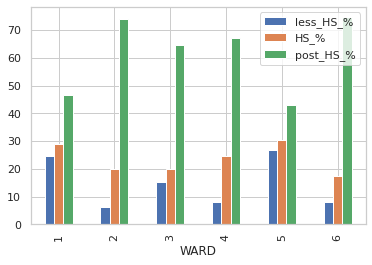

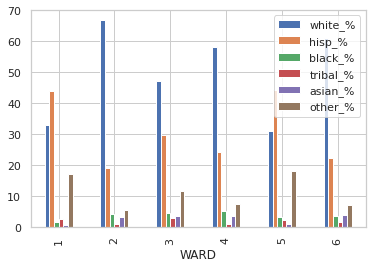

In [ ]:
# get index numbers for column names
ward_col = list(ward_per_df.columns.values)

# plot bar graph for reported number education
edu_graph = ward_per_df.plot(y= ward_col[-3:], kind= 'bar')

#view education graph
edu_graph

# get index numbers for column names
ward_col = list(ward_per_df.columns.values)

# plot bar graph for reported number education
race_graph = ward_per_df.plot(y= ward_col[:6], kind= 'bar')

# view race graph
race_graph

These graphs show that in Wards 1 and 5, being of hispanic majority, have the hightest instances of not completing HS. 

Wards 2,3,4, and 6 both show white majority populations and have significantly lower rates of not finishing HS.

Thus Wards 1 and 5, or those neighborhoods and Wards with non-white majority should be the focus for outreach programs and increased funding to encourage more HS completion and post-secondary education attendance.